In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
## Chicago Boundary
filename = '/Users/peixingrui/Desktop/Chicago Boundary/chicago_boundary_city.shp'
city = gpd.read_file(filename)

In [4]:
## Northeastern IL Land Use
filename = '/Users/peixingrui/Desktop/Northeastern IL Land Use/2018_Land_Use_Inventory_for_Northeastern_Illinois.shp'
landuse = gpd.read_file(filename)

In [5]:
## Chicago Land Use
# we short the land use data based on the Chicago boundary
chi_landuse = gpd.sjoin(landuse, city, op='within')

/Users/peixingrui/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/gl/dzkn02x514v6qwhqtxd3swbm0000gn/T/ipykernel_54578/3041055449.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  chi_landuse = gpd.sjoin(landuse, city, op='within')


In [6]:
chi_landuse.head()

,OBJECTID,FIRST_COUN,LANDUSE,LANDUSE2,OS_MGMT,FAC_NAME,PLATTED,MODIFIER,ORIG_FID,Shape__Are,Shape__Len,geometry,index_right,name,objectid,shape_area,shape_len
11135,11136,031,1111,None,None,None,None,None,11136,1887.503906,176.248110,"POLYGON ((-87.81964 42.01734, -87.81975 42.017...",0,CHICAGO,1.0,6.450277e+09,845282.931362
11139,11140,031,1111,None,None,None,None,None,11140,3736.523438,248.346164,"POLYGON ((-87.81373 42.01162, -87.81383 42.011...",0,CHICAGO,1.0,6.450277e+09,845282.931362
11140,11141,031,1111,None,None,None,None,None,11141,5591.449219,320.472368,"POLYGON ((-87.81008 42.01172, -87.81018 42.011...",0,CHICAGO,1.0,6.450277e+09,845282.931362
11141,11142,031,1111,None,None,None,None,None,11142,2634.398438,205.370938,"POLYGON ((-87.81894 42.01189, -87.81940 42.011...",0,CHICAGO,1.0,6.450277e+09,845282.931362
11142,11143,031,1111,None,None,None,None,None,11143,5588.730469,320.748618,"POLYGON ((-87.81894 42.01241, -87.81940 42.012...",0,CHICAGO,1.0,6.450277e+09,845282.931362


In [7]:
# find all the unique land use category code in Chicago
chi_landuse.LANDUSE.unique()

array(['1111', '1112', '1130', '1140', '1151', '1211', '1212', '1214',
       '1215', '1216', '1220', '1240', '1250', '1310', '1321', '1322',
       '1330', '1340', '1350', '1360', '1370', '1410', '1420', '1431',
       '1432', '1433', '1450', '1511', '1512', '1520', '1530', '1540',
       '1550', '1561', '1562', '1563', '1564', '1565', '1570', '2000',
       '3100', '3200', '3300', '3400', '3500', '4110', '4120', '4130',
       '4140', '4210', '4220', '4230', '4240', '5000', '9999', '6000'],
      dtype=object)

In [8]:
# Upload the land code definition
filename = '/Users/peixingrui/Desktop/Northeastern IL Land Use/land_code.csv'
code = pd.read_csv(filename)
code

,LANDUSE,CMAP_TYPE,TYPE_L1,TYPE_USERDEF
0,1111,RES_SF_DETACHED,Residential,Residential Single Family
1,1112,RES_SF_ATTACHED,Residential,Residential Single Family
2,1130,RES_MF,Residential,Residential Multi Family
3,1140,RES_MOBILE,Residential,Residential Mobile Home
4,1151,RES_COMMON,Residential,Residential Common Area
5,1211,COM_MALL,Commercial,Shopping Malls
6,1212,COM_REGIONAL,Commercial,Retail Centers
7,1214,COM_BIGBOX,Commercial,Retail Centers
8,1215,COM_URBMIX,Commercial,Commercial Urban Mix
9,1216,COM_URBMIXwRES,Commercial,Commercial Urban Mix


In [9]:
# To merge the data, make sure the LANDUSE type for both dataframe is the same.
chi_landuse['LANDUSE'] = chi_landuse['LANDUSE'].astype(int)
code['LANDUSE'] = code['LANDUSE'].astype(int)

# Merge the land use data and the code definition using merege left
chi_landuse = pd.merge(chi_landuse, code, on = 'LANDUSE', how = 'left')

In [10]:
chi_landuse.head()

,OBJECTID,FIRST_COUN,LANDUSE,LANDUSE2,OS_MGMT,FAC_NAME,PLATTED,MODIFIER,ORIG_FID,Shape__Are,Shape__Len,geometry,index_right,name,objectid,shape_area,shape_len,CMAP_TYPE,TYPE_L1,TYPE_USERDEF
0,11136,031,1111,None,None,None,None,None,11136,1887.503906,176.248110,"POLYGON ((-87.81964 42.01734, -87.81975 42.017...",0,CHICAGO,1.0,6.450277e+09,845282.931362,RES_SF_DETACHED,Residential,Residential Single Family
1,11140,031,1111,None,None,None,None,None,11140,3736.523438,248.346164,"POLYGON ((-87.81373 42.01162, -87.81383 42.011...",0,CHICAGO,1.0,6.450277e+09,845282.931362,RES_SF_DETACHED,Residential,Residential Single Family
2,11141,031,1111,None,None,None,None,None,11141,5591.449219,320.472368,"POLYGON ((-87.81008 42.01172, -87.81018 42.011...",0,CHICAGO,1.0,6.450277e+09,845282.931362,RES_SF_DETACHED,Residential,Residential Single Family
3,11142,031,1111,None,None,None,None,None,11142,2634.398438,205.370938,"POLYGON ((-87.81894 42.01189, -87.81940 42.011...",0,CHICAGO,1.0,6.450277e+09,845282.931362,RES_SF_DETACHED,Residential,Residential Single Family
4,11143,031,1111,None,None,None,None,None,11143,5588.730469,320.748618,"POLYGON ((-87.81894 42.01241, -87.81940 42.012...",0,CHICAGO,1.0,6.450277e+09,845282.931362,RES_SF_DETACHED,Residential,Residential Single Family


In [11]:
chi_landuse.columns

Index(['OBJECTID', 'FIRST_COUN', 'LANDUSE', 'LANDUSE2', 'OS_MGMT', 'FAC_NAME',
       'PLATTED', 'MODIFIER', 'ORIG_FID', 'Shape__Are', 'Shape__Len',
       'geometry', 'index_right', 'name', 'objectid', 'shape_area',
       'shape_len', 'CMAP_TYPE', 'TYPE_L1', 'TYPE_USERDEF'],
      dtype='object')

In [12]:
chi_landuse = chi_landuse[['OBJECTID', 'FIRST_COUN', 'LANDUSE', 'LANDUSE2', 'geometry', 
                           'CMAP_TYPE', 'TYPE_L1', 'TYPE_USERDEF']]

In [13]:
chi_landuse.columns

Index(['OBJECTID', 'FIRST_COUN', 'LANDUSE', 'LANDUSE2', 'geometry',
       'CMAP_TYPE', 'TYPE_L1', 'TYPE_USERDEF'],
      dtype='object')

In [14]:
chi_landuse.CMAP_TYPE.unique()

array(['RES_SF_DETACHED', 'RES_SF_ATTACHED', 'RES_MF', 'RES_MOBILE',
       'RES_COMMON', 'COM_MALL', 'COM_REGIONAL', 'COM_BIGBOX',
       'COM_URBMIX', 'COM_URBMIXwRES', 'COM_OFFICE', 'COM_CULT_ENT',
       'COM_HOTEL', 'INST_MEDICAL', 'INST_EDU_K12', 'INST_EDU_HIGHER',
       'INST_GOVT', 'INST_PRISON', 'INST_RELIGIOUS', 'INST_CEMETERY',
       'INST_OTHER\t', 'IND_MINERAL', 'IND_GENERAL', 'IND_MANUF_100K',
       'IND_WAREH_100K', 'IND_FLEX_100K', 'IND_STORAGE', 'TCU_ROW_RAIL',
       'TCU_ROW_ROAD', 'TCU_OTH_LINEAR', 'TCU_AIR', 'TCU_PARKING',
       'TCU_COMM', 'TCU_ROW_UTIL', 'TCU_WWTP', 'TCU_LANDFILL',
       'TCU_OTH_UTIL', 'TCU_STORMWATER', 'TCU_INTERMODAL', 'AG', 'OS_REC',
       'OS_GOLF', 'OS_CONS', 'OS_PRIVATE', 'OS_TRAIL', 'VACANT_RES',
       'VACANT_COM', 'VACANT_IND', 'VACANT_OTHER', 'CONST_RES',
       'CONST_COM', 'CONST_IND', 'CONST_OTHER', 'WATER', 'UNCODEABLE',
       'NON_PARCEL'], dtype=object)

In [15]:
## EV Charging Station Data
cstat_df = pd.read_csv('/Users/peixingrui/Desktop/Northeastern IL Land Use/chicago_alt_fuel_stations (1).csv')
cstat_gdf = gpd.GeoDataFrame(cstat_df, geometry=gpd.points_from_xy(cstat_df.Longitude, cstat_df.Latitude))
cstat_gdf.crs = {'init': 'epsg:4326'}

/Users/peixingrui/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [16]:
cstat_gdf.head()

,Stat_Name,Stat_ID,Stat_Address,City,State,ZIPCODE,Stat_Access,Stat_Access_Time,L2_EVSE,DCFC_EVSE,...,Latitude,Longitude,Conf_date,Open_date,Stat_Connector,Facility_Type,EVPrice,MaxVehClass,WrkplcStat,geometry
0,O'Hare Airport - Short Term Parking,40794,10000 W O'Hare Ave,Chicago,IL,60666,public,24 hours daily; pay lot,6.0,NaN,...,41.978506,-87.903280,10/11/22,2/11/11,J1772,AIRPORT,Free,LD,False,POINT (-87.90328 41.97851)
1,Berman Nissan - Chicago,46806,4444 W Irving Park Rd,Chicago,IL,60641,public,Dealership business hours; contact 773-282-620...,1.0,NaN,...,41.953751,-87.739697,6/9/20,1/31/12,J1772,CAR_DEALER,Free,NaN,False,POINT (-87.73970 41.95375)
2,900 SELF PARK PLUG AND SHOP 2,56874,911 N. Rush St.,Chicago,IL,60611,public,24 hours daily,2.0,NaN,...,41.899760,-87.626372,10/18/23,1/20/14,J1772,NaN,NaN,NaN,False,POINT (-87.62637 41.89976)
3,3RD FLOOR GREENWAY-3,58326,60 W Kinzie St,Chicago,IL,60661,public,24 hours daily,2.0,NaN,...,41.889356,-87.630403,10/18/23,1/20/14,J1772,NaN,NaN,NaN,False,POINT (-87.63040 41.88936)
4,PARKING A MAIN GARAGE,60583,5841 S Maryland Ave,Chicago,IL,60637,public,24 hours daily,2.0,NaN,...,41.788720,-87.605020,10/18/23,2/27/14,J1772,NaN,NaN,NaN,False,POINT (-87.60502 41.78872)


In [17]:
# merge the data point to the land use polygon using within

#chi_landuse = gpd.sjoin(landuse, city, op='within')

updated_cstat = gpd.sjoin(cstat_gdf, chi_landuse, op='within')

/Users/peixingrui/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/gl/dzkn02x514v6qwhqtxd3swbm0000gn/T/ipykernel_54578/611017245.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  updated_cstat = gpd.sjoin(cstat_gdf, chi_landuse, op='within')


In [18]:
updated_cstat.head()

,Stat_Name,Stat_ID,Stat_Address,City,State,ZIPCODE,Stat_Access,Stat_Access_Time,L2_EVSE,DCFC_EVSE,...,WrkplcStat,geometry,index_right,OBJECTID,FIRST_COUN,LANDUSE,LANDUSE2,CMAP_TYPE,TYPE_L1,TYPE_USERDEF
1,Berman Nissan - Chicago,46806,4444 W Irving Park Rd,Chicago,IL,60641,public,Dealership business hours; contact 773-282-620...,1.0,NaN,...,False,POINT (-87.73970 41.95375),125645,332130,031,1215,None,COM_URBMIX,Commercial,Commercial Urban Mix
2,900 SELF PARK PLUG AND SHOP 2,56874,911 N. Rush St.,Chicago,IL,60611,public,24 hours daily,2.0,NaN,...,False,POINT (-87.62637 41.89976),161072,421098,031,1540,None,TCU_PARKING,Transportation,Parking Lots
102,900 SELF PARK PLUG AND SHOP 3,171693,911 N. Rush St,Chicago,IL,60611,public,24 hours daily,2.0,NaN,...,False,POINT (-87.62635 41.89972),161072,421098,031,1540,None,TCU_PARKING,Transportation,Parking Lots
103,900 SELF PARK PLUG AND SHOP 1,171694,911 N. Rush St,Chicago,IL,60611,public,24 hours daily,2.0,NaN,...,False,POINT (-87.62638 41.89982),161072,421098,031,1540,None,TCU_PARKING,Transportation,Parking Lots
104,900 SELF PARK PLUG AND SHOP 4,171695,911 N. Rush St,Chicago,IL,60611,public,24 hours daily,2.0,NaN,...,False,POINT (-87.62631 41.89964),161072,421098,031,1540,None,TCU_PARKING,Transportation,Parking Lots


In [19]:
updated_cstat.TYPE_USERDEF.unique()

array(['Commercial Urban Mix', 'Parking Lots', 'Medical Facilities',
       'Roads', 'Office', 'Residential Multi Family', 'Retail Centers',
       'Airports', 'Industrial', 'Cultural and Entertainment Area',
       'Higher Education Institutions', 'Shopping Malls', 'Schools',
       'Private Property (Vacant)', 'Under Construction Property',
       'Hotels', 'Other Institutions', 'Open Space Recreation',
       'Government Institutions'], dtype=object)

In [20]:
len(updated_cstat.TYPE_USERDEF.unique())

19

In [21]:
updated_cstat = updated_cstat[['Stat_Name', 'Stat_ID', 'Stat_Address', 'City', 'State', 'ZIPCODE',
       'Stat_Access', 'Stat_Access_Time', 'L2_EVSE', 'DCFC_EVSE',
       'Stat_Network', 'Geocode Status', 'Latitude', 'Longitude', 'Conf_date',
       'Open_date', 'Stat_Connector', 'Facility_Type', 'EVPrice',
       'MaxVehClass', 'WrkplcStat','LANDUSE', 'CMAP_TYPE', 'TYPE_L1',
       'TYPE_USERDEF', 'geometry']]

In [22]:
updated_cstat.columns

Index(['Stat_Name', 'Stat_ID', 'Stat_Address', 'City', 'State', 'ZIPCODE',
       'Stat_Access', 'Stat_Access_Time', 'L2_EVSE', 'DCFC_EVSE',
       'Stat_Network', 'Geocode Status', 'Latitude', 'Longitude', 'Conf_date',
       'Open_date', 'Stat_Connector', 'Facility_Type', 'EVPrice',
       'MaxVehClass', 'WrkplcStat', 'LANDUSE', 'CMAP_TYPE', 'TYPE_L1',
       'TYPE_USERDEF', 'geometry'],
      dtype='object')

In [23]:
updated_cstat.head()

,Stat_Name,Stat_ID,Stat_Address,City,State,ZIPCODE,Stat_Access,Stat_Access_Time,L2_EVSE,DCFC_EVSE,...,Stat_Connector,Facility_Type,EVPrice,MaxVehClass,WrkplcStat,LANDUSE,CMAP_TYPE,TYPE_L1,TYPE_USERDEF,geometry
1,Berman Nissan - Chicago,46806,4444 W Irving Park Rd,Chicago,IL,60641,public,Dealership business hours; contact 773-282-620...,1.0,NaN,...,J1772,CAR_DEALER,Free,NaN,False,1215,COM_URBMIX,Commercial,Commercial Urban Mix,POINT (-87.73970 41.95375)
2,900 SELF PARK PLUG AND SHOP 2,56874,911 N. Rush St.,Chicago,IL,60611,public,24 hours daily,2.0,NaN,...,J1772,NaN,NaN,NaN,False,1540,TCU_PARKING,Transportation,Parking Lots,POINT (-87.62637 41.89976)
102,900 SELF PARK PLUG AND SHOP 3,171693,911 N. Rush St,Chicago,IL,60611,public,24 hours daily,2.0,NaN,...,J1772,NaN,NaN,NaN,False,1540,TCU_PARKING,Transportation,Parking Lots,POINT (-87.62635 41.89972)
103,900 SELF PARK PLUG AND SHOP 1,171694,911 N. Rush St,Chicago,IL,60611,public,24 hours daily,2.0,NaN,...,J1772,NaN,NaN,NaN,False,1540,TCU_PARKING,Transportation,Parking Lots,POINT (-87.62638 41.89982)
104,900 SELF PARK PLUG AND SHOP 4,171695,911 N. Rush St,Chicago,IL,60611,public,24 hours daily,2.0,NaN,...,J1772,NaN,NaN,NaN,False,1540,TCU_PARKING,Transportation,Parking Lots,POINT (-87.62631 41.89964)


Text(0.5, 0, 'Location Types')

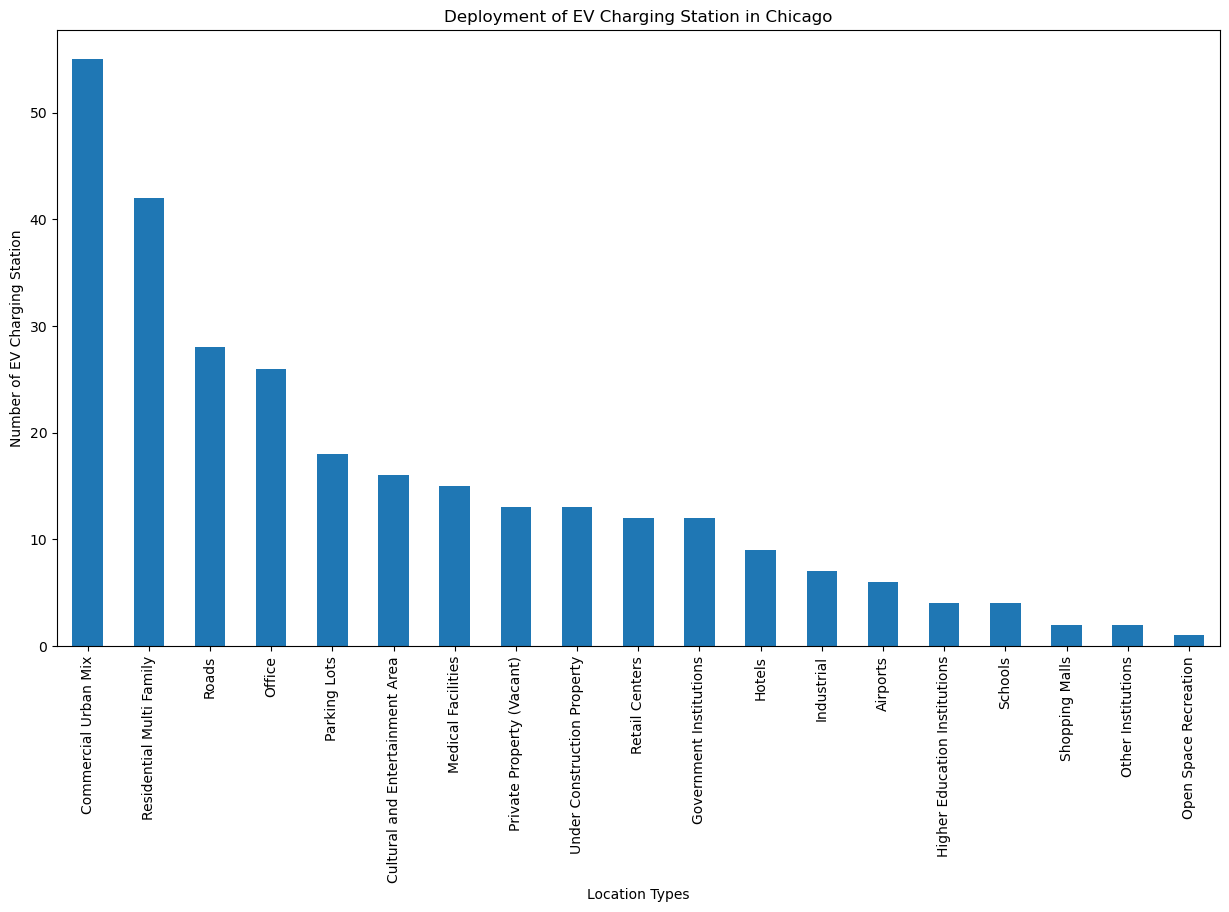

In [24]:
updated_cstat['TYPE_USERDEF'].value_counts().plot(kind='bar', figsize = (15,8))
plt.title("Deployment of EV Charging Station in Chicago")
plt.ylabel("Number of EV Charging Station")
plt.xlabel("Location Types")

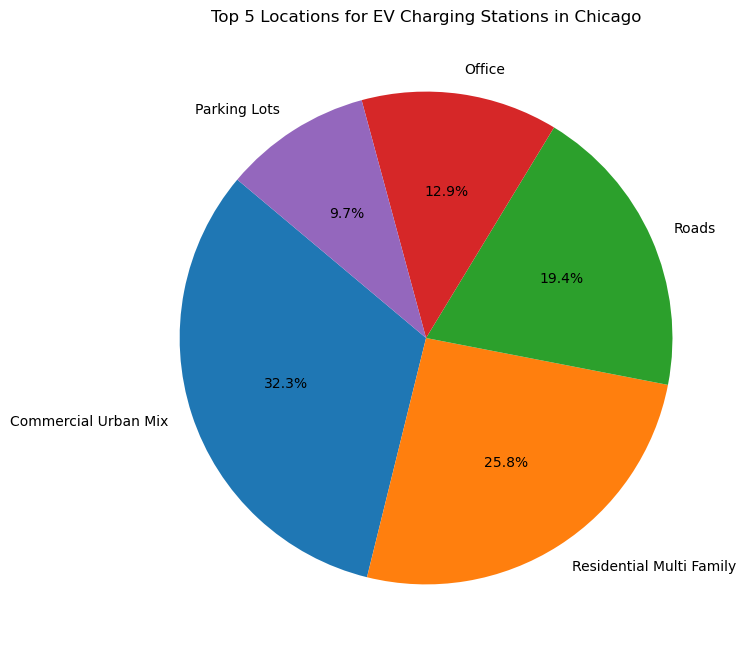

In [25]:

data = {
    'TYPE_USERDEF': ['Commercial Urban Mix', 'Residential Multi Family', 'Roads', 'Office', 'Parking Lots',
                     'Entertainment Area', 'Medical Facilities', 'Bare Property (Vacant)', 'Pre-construction Property',
                     'Retail Centers', 'Government Institutions', 'Hotels', 'Industrial', 'Airports', 'Schools', 
                     'Shopping Malls', 'Other Institutions', 'Open Space Recreation']
}
count_values = [50, 40, 30, 20, 15, 10, 8, 7, 6, 5, 4, 3, 2, 2, 1, 1, 1, 1]  
sorted_data = pd.DataFrame(data)
sorted_data['Counts'] = count_values


top_five = sorted_data.head(5)

plt.figure(figsize=(10, 8))
plt.pie(top_five['Counts'], labels=top_five['TYPE_USERDEF'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Locations for EV Charging Stations in Chicago')
plt.show()


In [26]:
updated_cstat

,Stat_Name,Stat_ID,Stat_Address,City,State,ZIPCODE,Stat_Access,Stat_Access_Time,L2_EVSE,DCFC_EVSE,...,Stat_Connector,Facility_Type,EVPrice,MaxVehClass,WrkplcStat,LANDUSE,CMAP_TYPE,TYPE_L1,TYPE_USERDEF,geometry
1,Berman Nissan - Chicago,46806,4444 W Irving Park Rd,Chicago,IL,60641,public,Dealership business hours; contact 773-282-620...,1.0,NaN,...,J1772,CAR_DEALER,Free,NaN,False,1215,COM_URBMIX,Commercial,Commercial Urban Mix,POINT (-87.73970 41.95375)
2,900 SELF PARK PLUG AND SHOP 2,56874,911 N. Rush St.,Chicago,IL,60611,public,24 hours daily,2.0,NaN,...,J1772,NaN,NaN,NaN,False,1540,TCU_PARKING,Transportation,Parking Lots,POINT (-87.62637 41.89976)
102,900 SELF PARK PLUG AND SHOP 3,171693,911 N. Rush St,Chicago,IL,60611,public,24 hours daily,2.0,NaN,...,J1772,NaN,NaN,NaN,False,1540,TCU_PARKING,Transportation,Parking Lots,POINT (-87.62635 41.89972)
103,900 SELF PARK PLUG AND SHOP 1,171694,911 N. Rush St,Chicago,IL,60611,public,24 hours daily,2.0,NaN,...,J1772,NaN,NaN,NaN,False,1540,TCU_PARKING,Transportation,Parking Lots,POINT (-87.62638 41.89982)
104,900 SELF PARK PLUG AND SHOP 4,171695,911 N. Rush St,Chicago,IL,60611,public,24 hours daily,2.0,NaN,...,J1772,NaN,NaN,NaN,False,1540,TCU_PARKING,Transportation,Parking Lots,POINT (-87.62631 41.89964)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,NM OIP 01 NORTH,312871,4457 IL-19,Chicago,IL,60641,public,24 hours daily,2.0,NaN,...,J1772,NaN,NaN,NaN,False,1130,RES_MF,Residential,Residential Multi Family,POINT (-87.74040 41.95309)
307,NM OIP 01 SOUTH,312873,4457 IL-19,Chicago,IL,60641,public,24 hours daily,2.0,NaN,...,J1772,NaN,NaN,NaN,False,1130,RES_MF,Residential,Residential Multi Family,POINT (-87.74027 41.95312)
306,NM OIP P1 NORTH,312872,4445 Irving Park Rd,Chicago,IL,60641,public,24 hours daily,2.0,NaN,...,J1772,NaN,NaN,NaN,False,1215,COM_URBMIX,Commercial,Commercial Urban Mix,POINT (-87.73977 41.95320)
308,NM OIP P1 SOUTH,312874,4445 W Irving Park Rd,Chicago,IL,60641,public,24 hours daily,2.0,NaN,...,J1772,NaN,NaN,NaN,False,1215,COM_URBMIX,Commercial,Commercial Urban Mix,POINT (-87.73973 41.95315)


In [27]:
updated_cstat.columns

Index(['Stat_Name', 'Stat_ID', 'Stat_Address', 'City', 'State', 'ZIPCODE',
       'Stat_Access', 'Stat_Access_Time', 'L2_EVSE', 'DCFC_EVSE',
       'Stat_Network', 'Geocode Status', 'Latitude', 'Longitude', 'Conf_date',
       'Open_date', 'Stat_Connector', 'Facility_Type', 'EVPrice',
       'MaxVehClass', 'WrkplcStat', 'LANDUSE', 'CMAP_TYPE', 'TYPE_L1',
       'TYPE_USERDEF', 'geometry'],
      dtype='object')

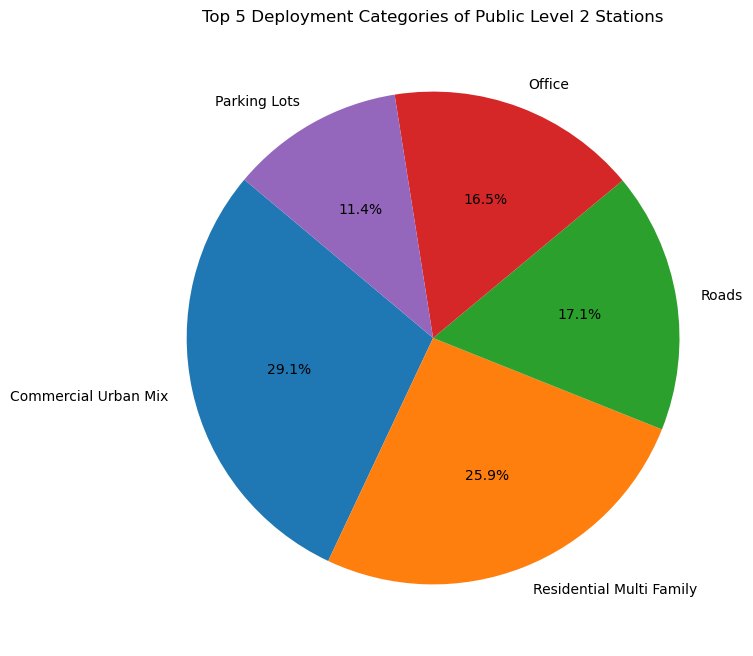

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'updated_cstat' is your DataFrame with the given columns.
# Make sure to filter out rows where L2_EVSE is greater than 0
l2_stations = updated_cstat[updated_cstat['L2_EVSE'] > 0]

# Count the occurrence of each category
deployment_counts = l2_stations['TYPE_USERDEF'].value_counts()

# Select the top 5 categories
top_deployment_counts = deployment_counts.nlargest(5)

# Plotting the pie chart for the top 5 categories
plt.figure(figsize=(10, 8))
top_deployment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Deployment Categories of Public Level 2 Stations')
plt.ylabel('')  # This hides the 'TYPE_USERDEF' label on the y-axis
plt.show()


In [29]:
l2_stations['L2_EVSE'].unique()


array([ 1.,  2.,  4.,  3.,  6., 12.,  5.,  9.,  7.,  8.])

In [30]:
# Plot:
# 1. the pie chart of this graph.
# 2. Plot The deployment category of Public Level 2 Station (make sure to only consider L2_EVSE > 0 )
# 3. Plot The deployment category of Public DCFC Station (make sure to only consider DCFC_EVSE > 0 and Stat_Network not "Tesla")
# 4. Plot The deployment category of Tesla Supercharge Station (make sure to only consider DCFC_EVSE > 0 and Stat_Network is "Tesla")

In [31]:
updated_cstat.columns

Index(['Stat_Name', 'Stat_ID', 'Stat_Address', 'City', 'State', 'ZIPCODE',
       'Stat_Access', 'Stat_Access_Time', 'L2_EVSE', 'DCFC_EVSE',
       'Stat_Network', 'Geocode Status', 'Latitude', 'Longitude', 'Conf_date',
       'Open_date', 'Stat_Connector', 'Facility_Type', 'EVPrice',
       'MaxVehClass', 'WrkplcStat', 'LANDUSE', 'CMAP_TYPE', 'TYPE_L1',
       'TYPE_USERDEF', 'geometry'],
      dtype='object')

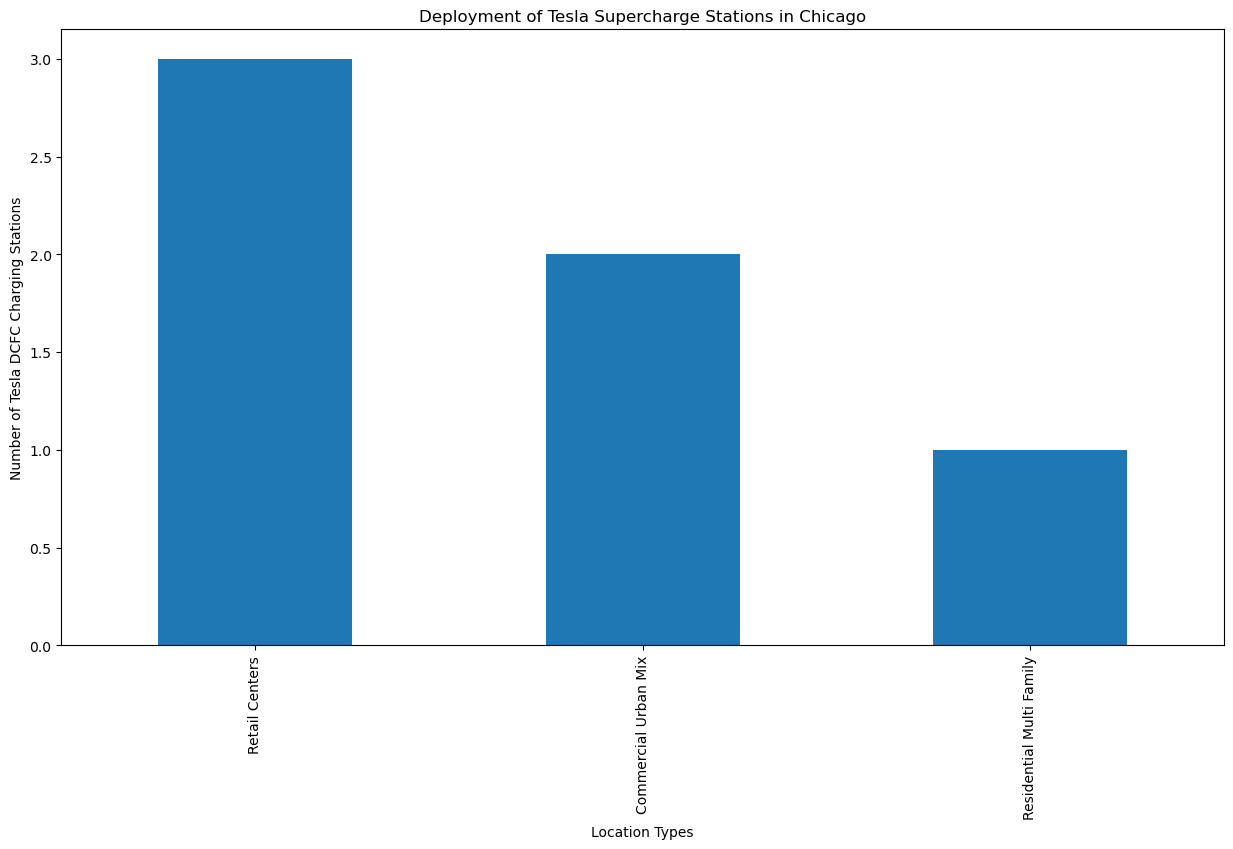

In [32]:

tesla_stations = updated_cstat[(updated_cstat['DCFC_EVSE'] > 0) & (updated_cstat['Stat_Network'] == 'Tesla')]

tesla_deployment_counts = tesla_stations['TYPE_USERDEF'].value_counts()

plt.figure(figsize=(15, 8))
tesla_deployment_counts.plot(kind='bar')
plt.title("Deployment of Tesla Supercharge Stations in Chicago")
plt.ylabel("Number of Tesla DCFC Charging Stations")
plt.xlabel("Location Types")
plt.show()


Index(['Stat_Name', 'Stat_ID', 'Stat_Address', 'City', 'State', 'ZIPCODE',
       'Stat_Access', 'Stat_Access_Time', 'L2_EVSE', 'DCFC_EVSE',
       'Stat_Network', 'Geocode Status', 'Latitude', 'Longitude', 'Conf_date',
       'Open_date', 'Stat_Connector', 'Facility_Type', 'EVPrice',
       'MaxVehClass', 'WrkplcStat', 'LANDUSE', 'CMAP_TYPE', 'TYPE_L1',
       'TYPE_USERDEF', 'geometry'],
      dtype='object')


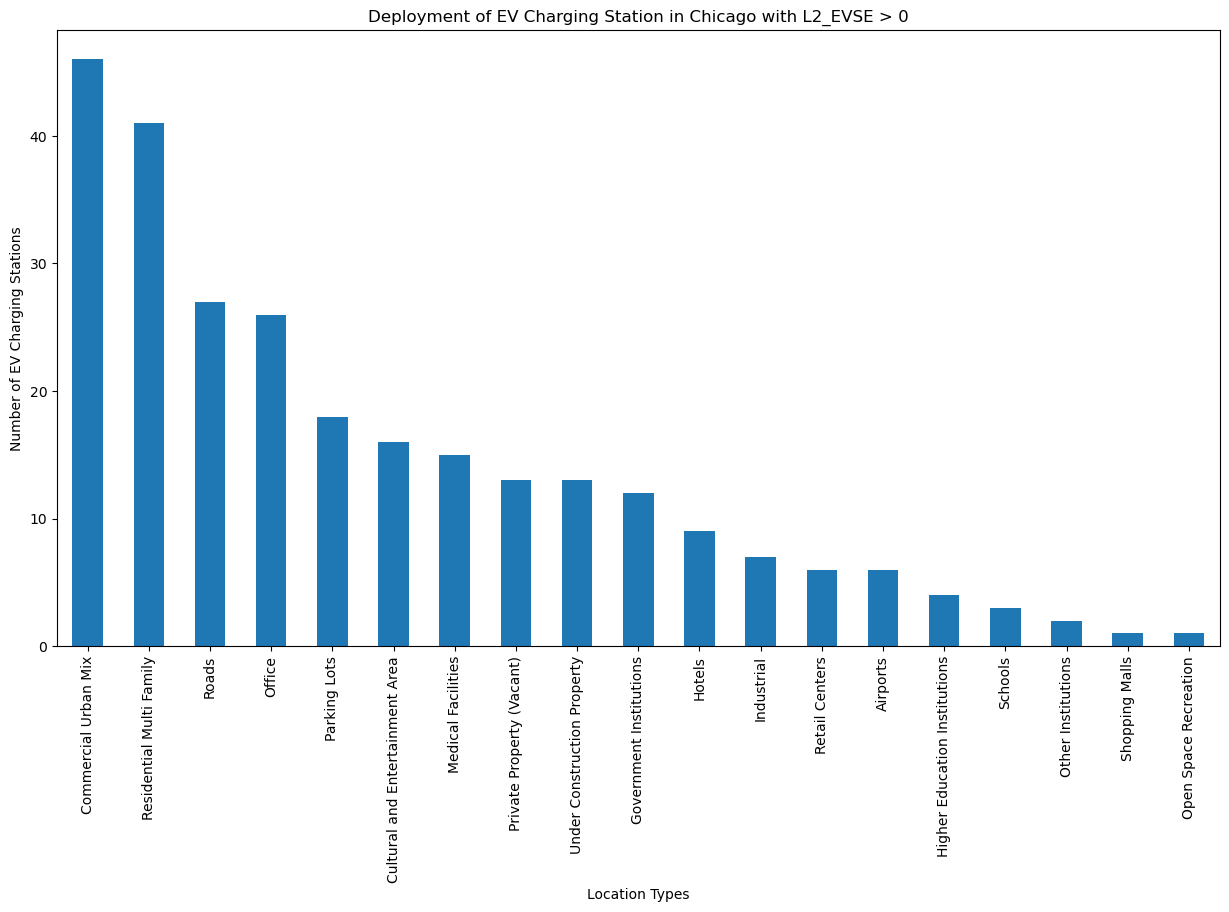

In [33]:

print(updated_cstat.columns)

l2_positive = updated_cstat[updated_cstat['L2_EVSE'] > 0]


l2_positive['TYPE_USERDEF'].value_counts().plot(kind='bar', figsize=(15,8))
plt.title("Deployment of EV Charging Station in Chicago with L2_EVSE > 0")
plt.ylabel("Number of EV Charging Stations")
plt.xlabel("Location Types")
plt.show()


In [34]:
# how to find column name?
# format dataframe.columns

updated_cstat.columns

Index(['Stat_Name', 'Stat_ID', 'Stat_Address', 'City', 'State', 'ZIPCODE',
       'Stat_Access', 'Stat_Access_Time', 'L2_EVSE', 'DCFC_EVSE',
       'Stat_Network', 'Geocode Status', 'Latitude', 'Longitude', 'Conf_date',
       'Open_date', 'Stat_Connector', 'Facility_Type', 'EVPrice',
       'MaxVehClass', 'WrkplcStat', 'LANDUSE', 'CMAP_TYPE', 'TYPE_L1',
       'TYPE_USERDEF', 'geometry'],
      dtype='object')

In [35]:
# this is how check what are all values in a certain column
# format dataframe.column name.unique()

updated_cstat.L2_EVSE.unique()

array([ 1.,  2.,  4., nan,  3.,  6., 12.,  5.,  9.,  7.,  8.])

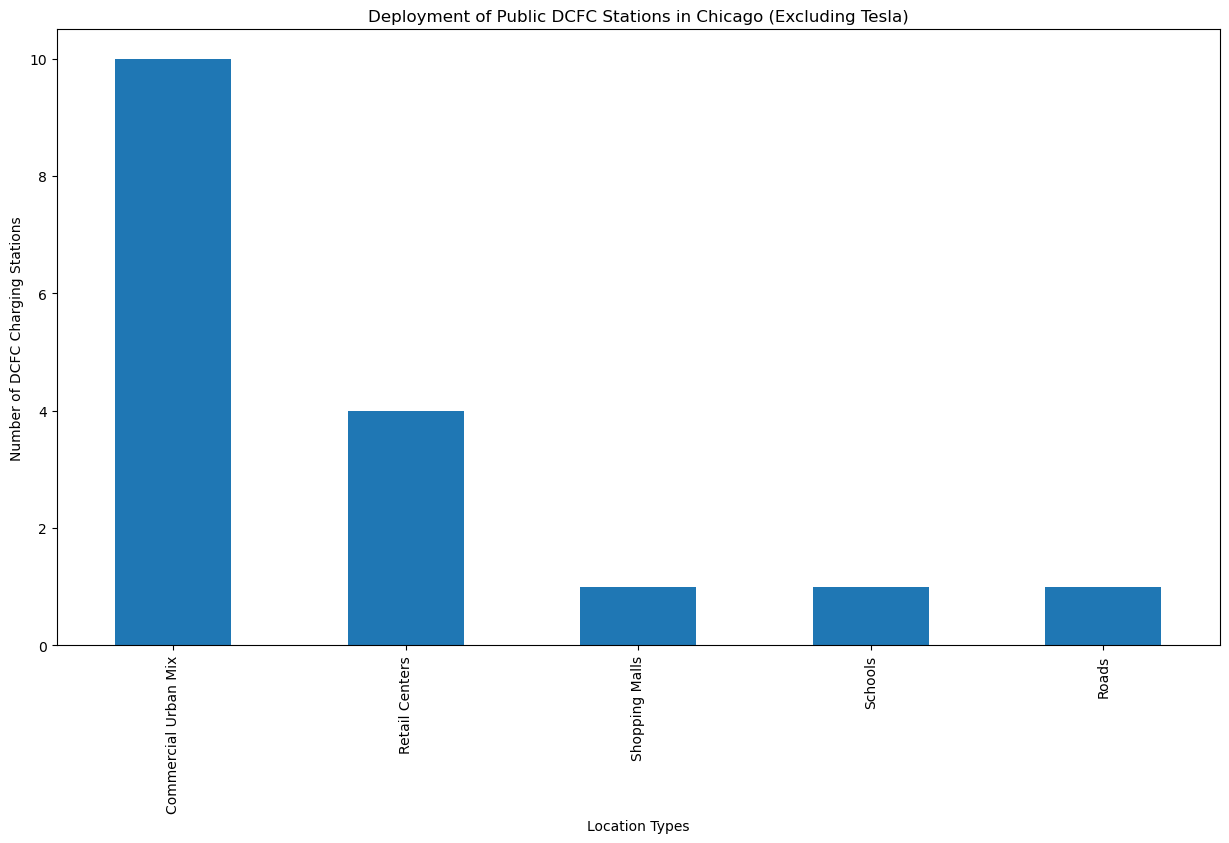

In [36]:
import matplotlib.pyplot as plt

dcfc_stations = updated_cstat[(updated_cstat['DCFC_EVSE'] > 0) & (updated_cstat['Stat_Network'] != 'Tesla')]

deployment_counts = dcfc_stations['TYPE_USERDEF'].value_counts()

plt.figure(figsize=(15, 8))
deployment_counts.plot(kind='bar')
plt.title("Deployment of Public DCFC Stations in Chicago (Excluding Tesla)")
plt.ylabel("Number of DCFC Charging Stations")
plt.xlabel("Location Types")
plt.show()


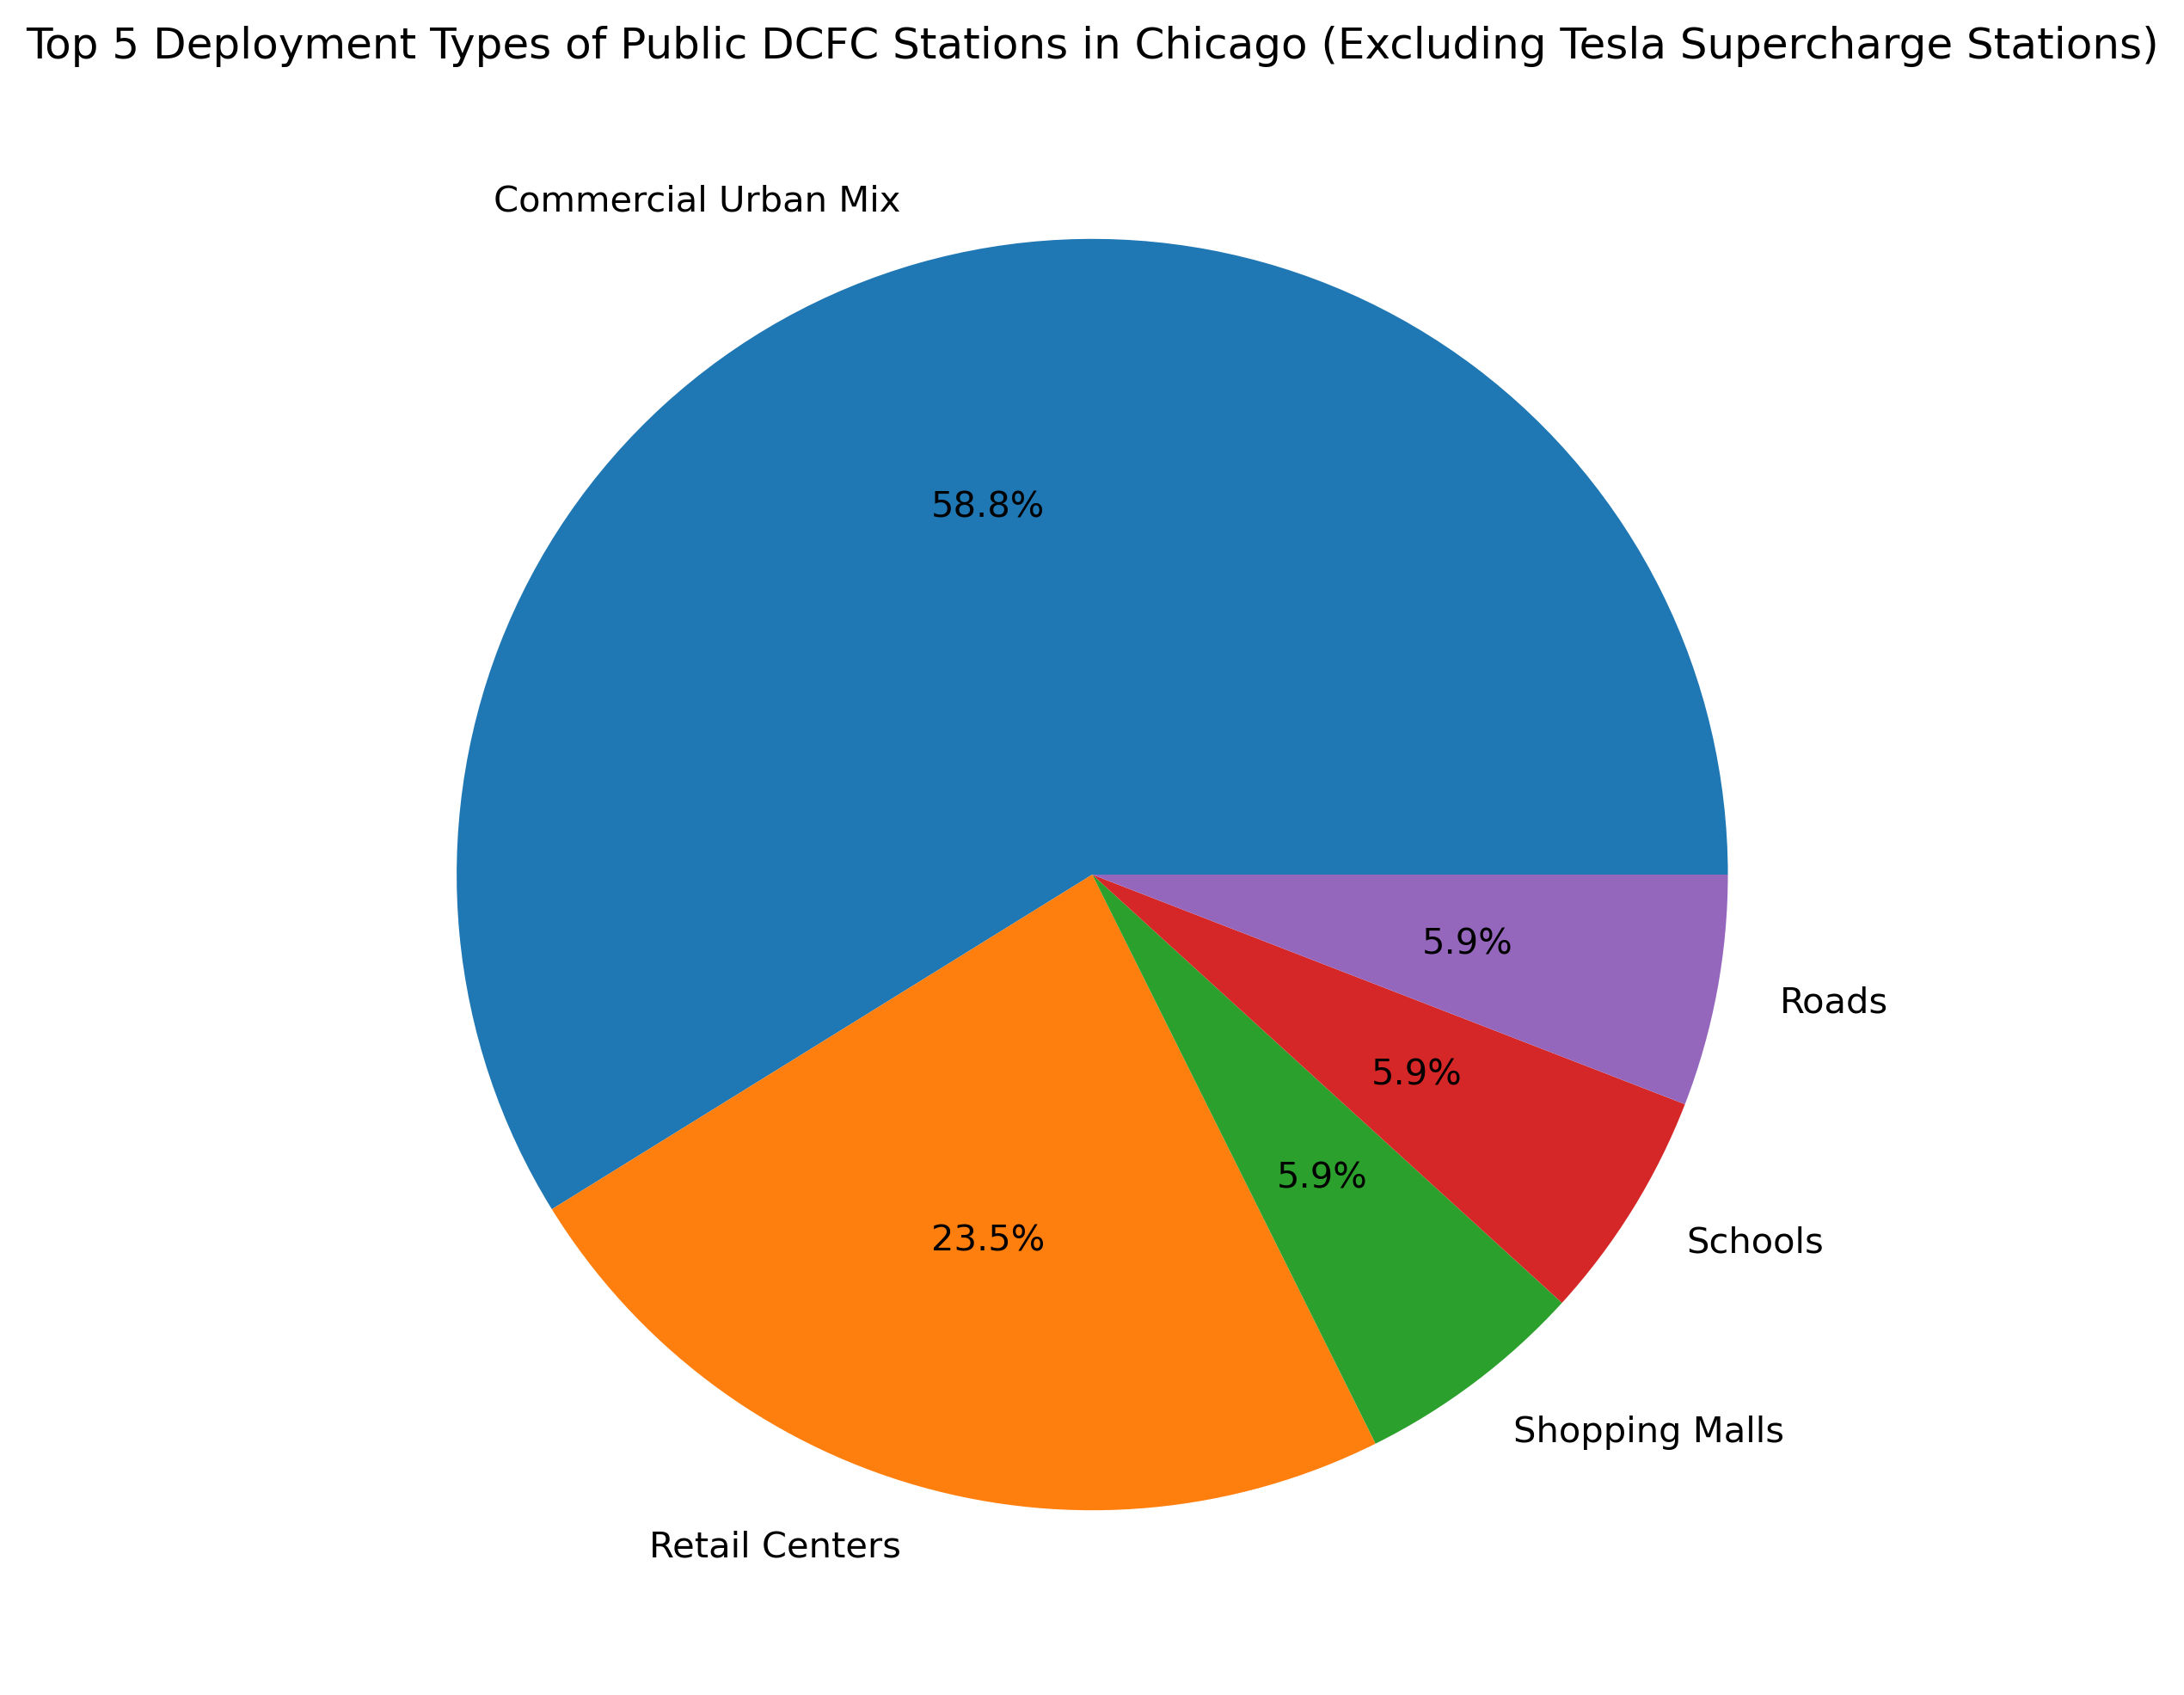

In [42]:
plt.figure(figsize=(8, 8))  
deployment_counts.head(5).plot(kind='pie', autopct='%1.1f%%') 
plt.title("Top 5 Deployment Types of Public DCFC Stations in Chicago (Excluding Tesla Supercharge Stations)")  
plt.ylabel('')  
plt.show()



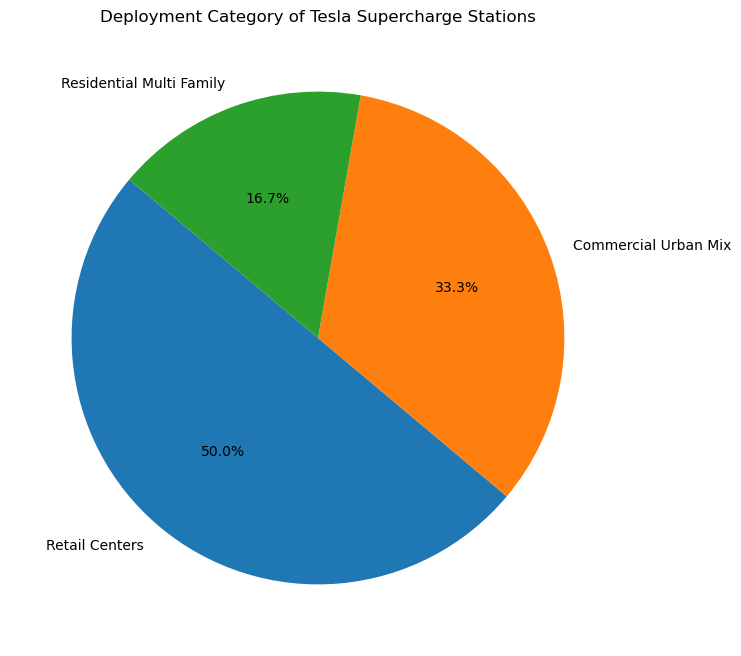

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'updated_cstat' is your DataFrame loaded from your data source
# Filter for Tesla Supercharge Stations with DCFC_EVSE > 0
tesla_stations = updated_cstat[(updated_cstat['DCFC_EVSE'] > 0) & (updated_cstat['Stat_Network'] == 'Tesla')]

# Count the occurrence of each category in 'TYPE_USERDEF'
tesla_deployment_counts = tesla_stations['TYPE_USERDEF'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
tesla_deployment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Deployment Category of Tesla Supercharge Stations')
plt.ylabel('')  # This hides the 'TYPE_USERDEF' label on the y-axis
plt.show()


In [39]:
#chi_landuse_test = chi_landuse[chi_landuse['LANDUSE']==1530]

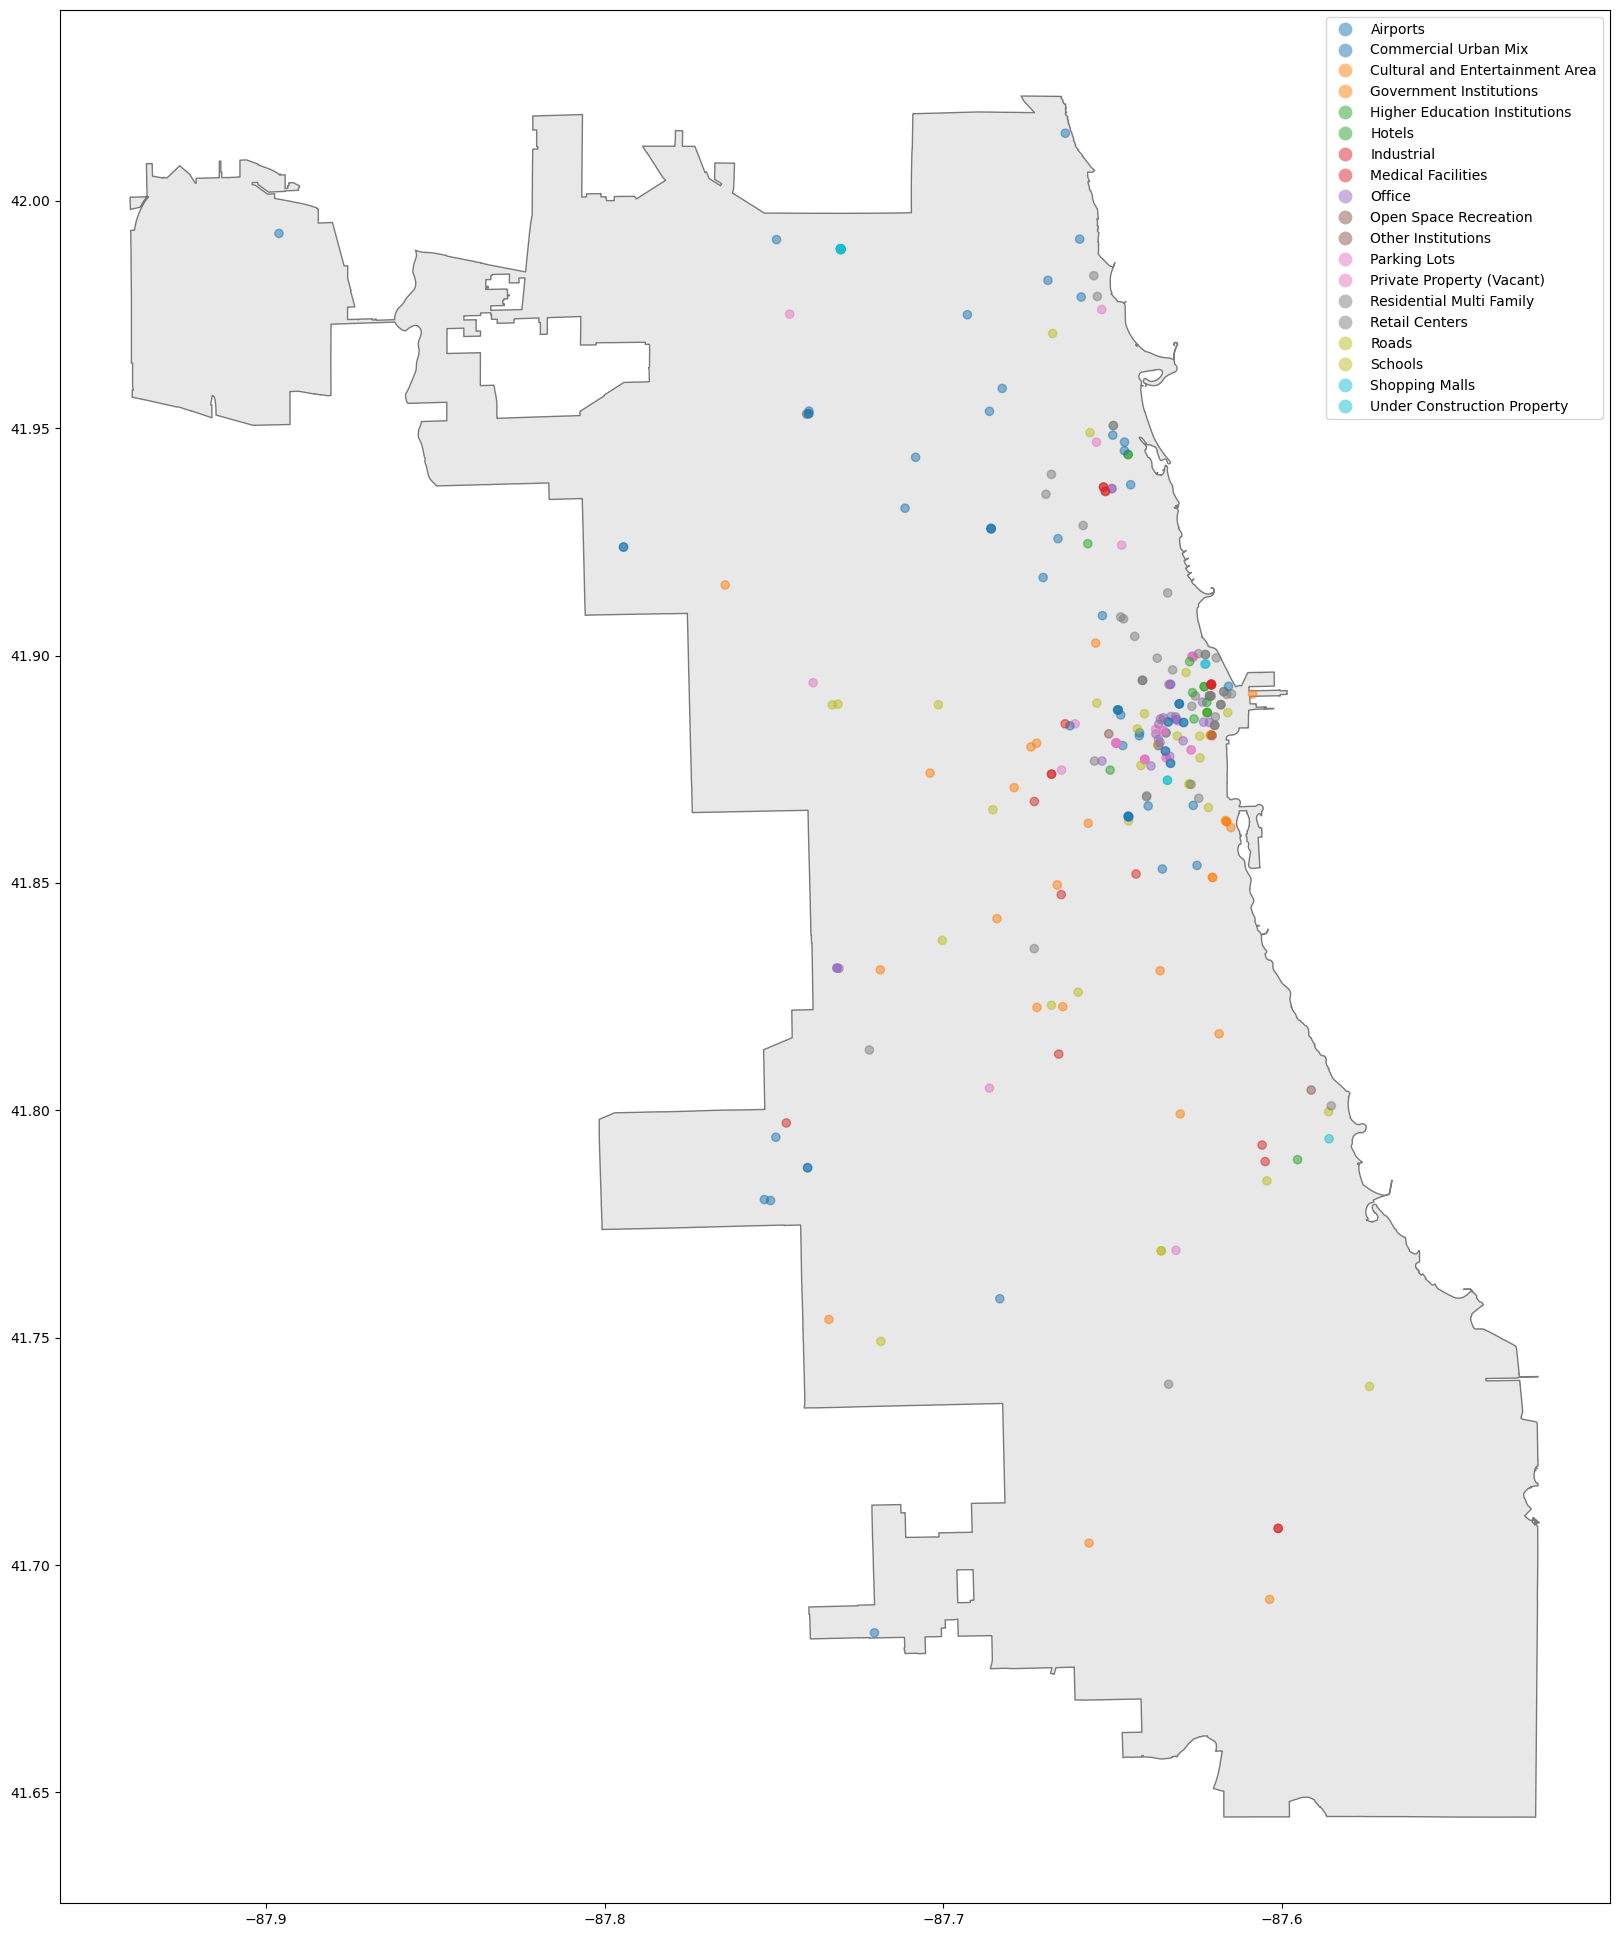

In [40]:
# Plot the data
fig, ax = plt.subplots(figsize = (20,30))
plt.rcParams['figure.dpi'] = 300
city.plot(ax=ax, color='#D3D3D3', edgecolor='black', alpha = 0.5)  
updated_cstat.plot(ax=ax, column = 'TYPE_USERDEF',  alpha = 0.5, categorical=True, legend=True)
plt.show()

In [41]:
## Save the data
updated_cstat.to_file('updated_ev_stations.shp')
updated_cstat_df = pd.DataFrame(updated_cstat)
updated_cstat_df.to_csv('updated_ev_stations.csv')

/var/folders/gl/dzkn02x514v6qwhqtxd3swbm0000gn/T/ipykernel_54578/872622855.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  updated_cstat.to_file('updated_ev_stations.shp')


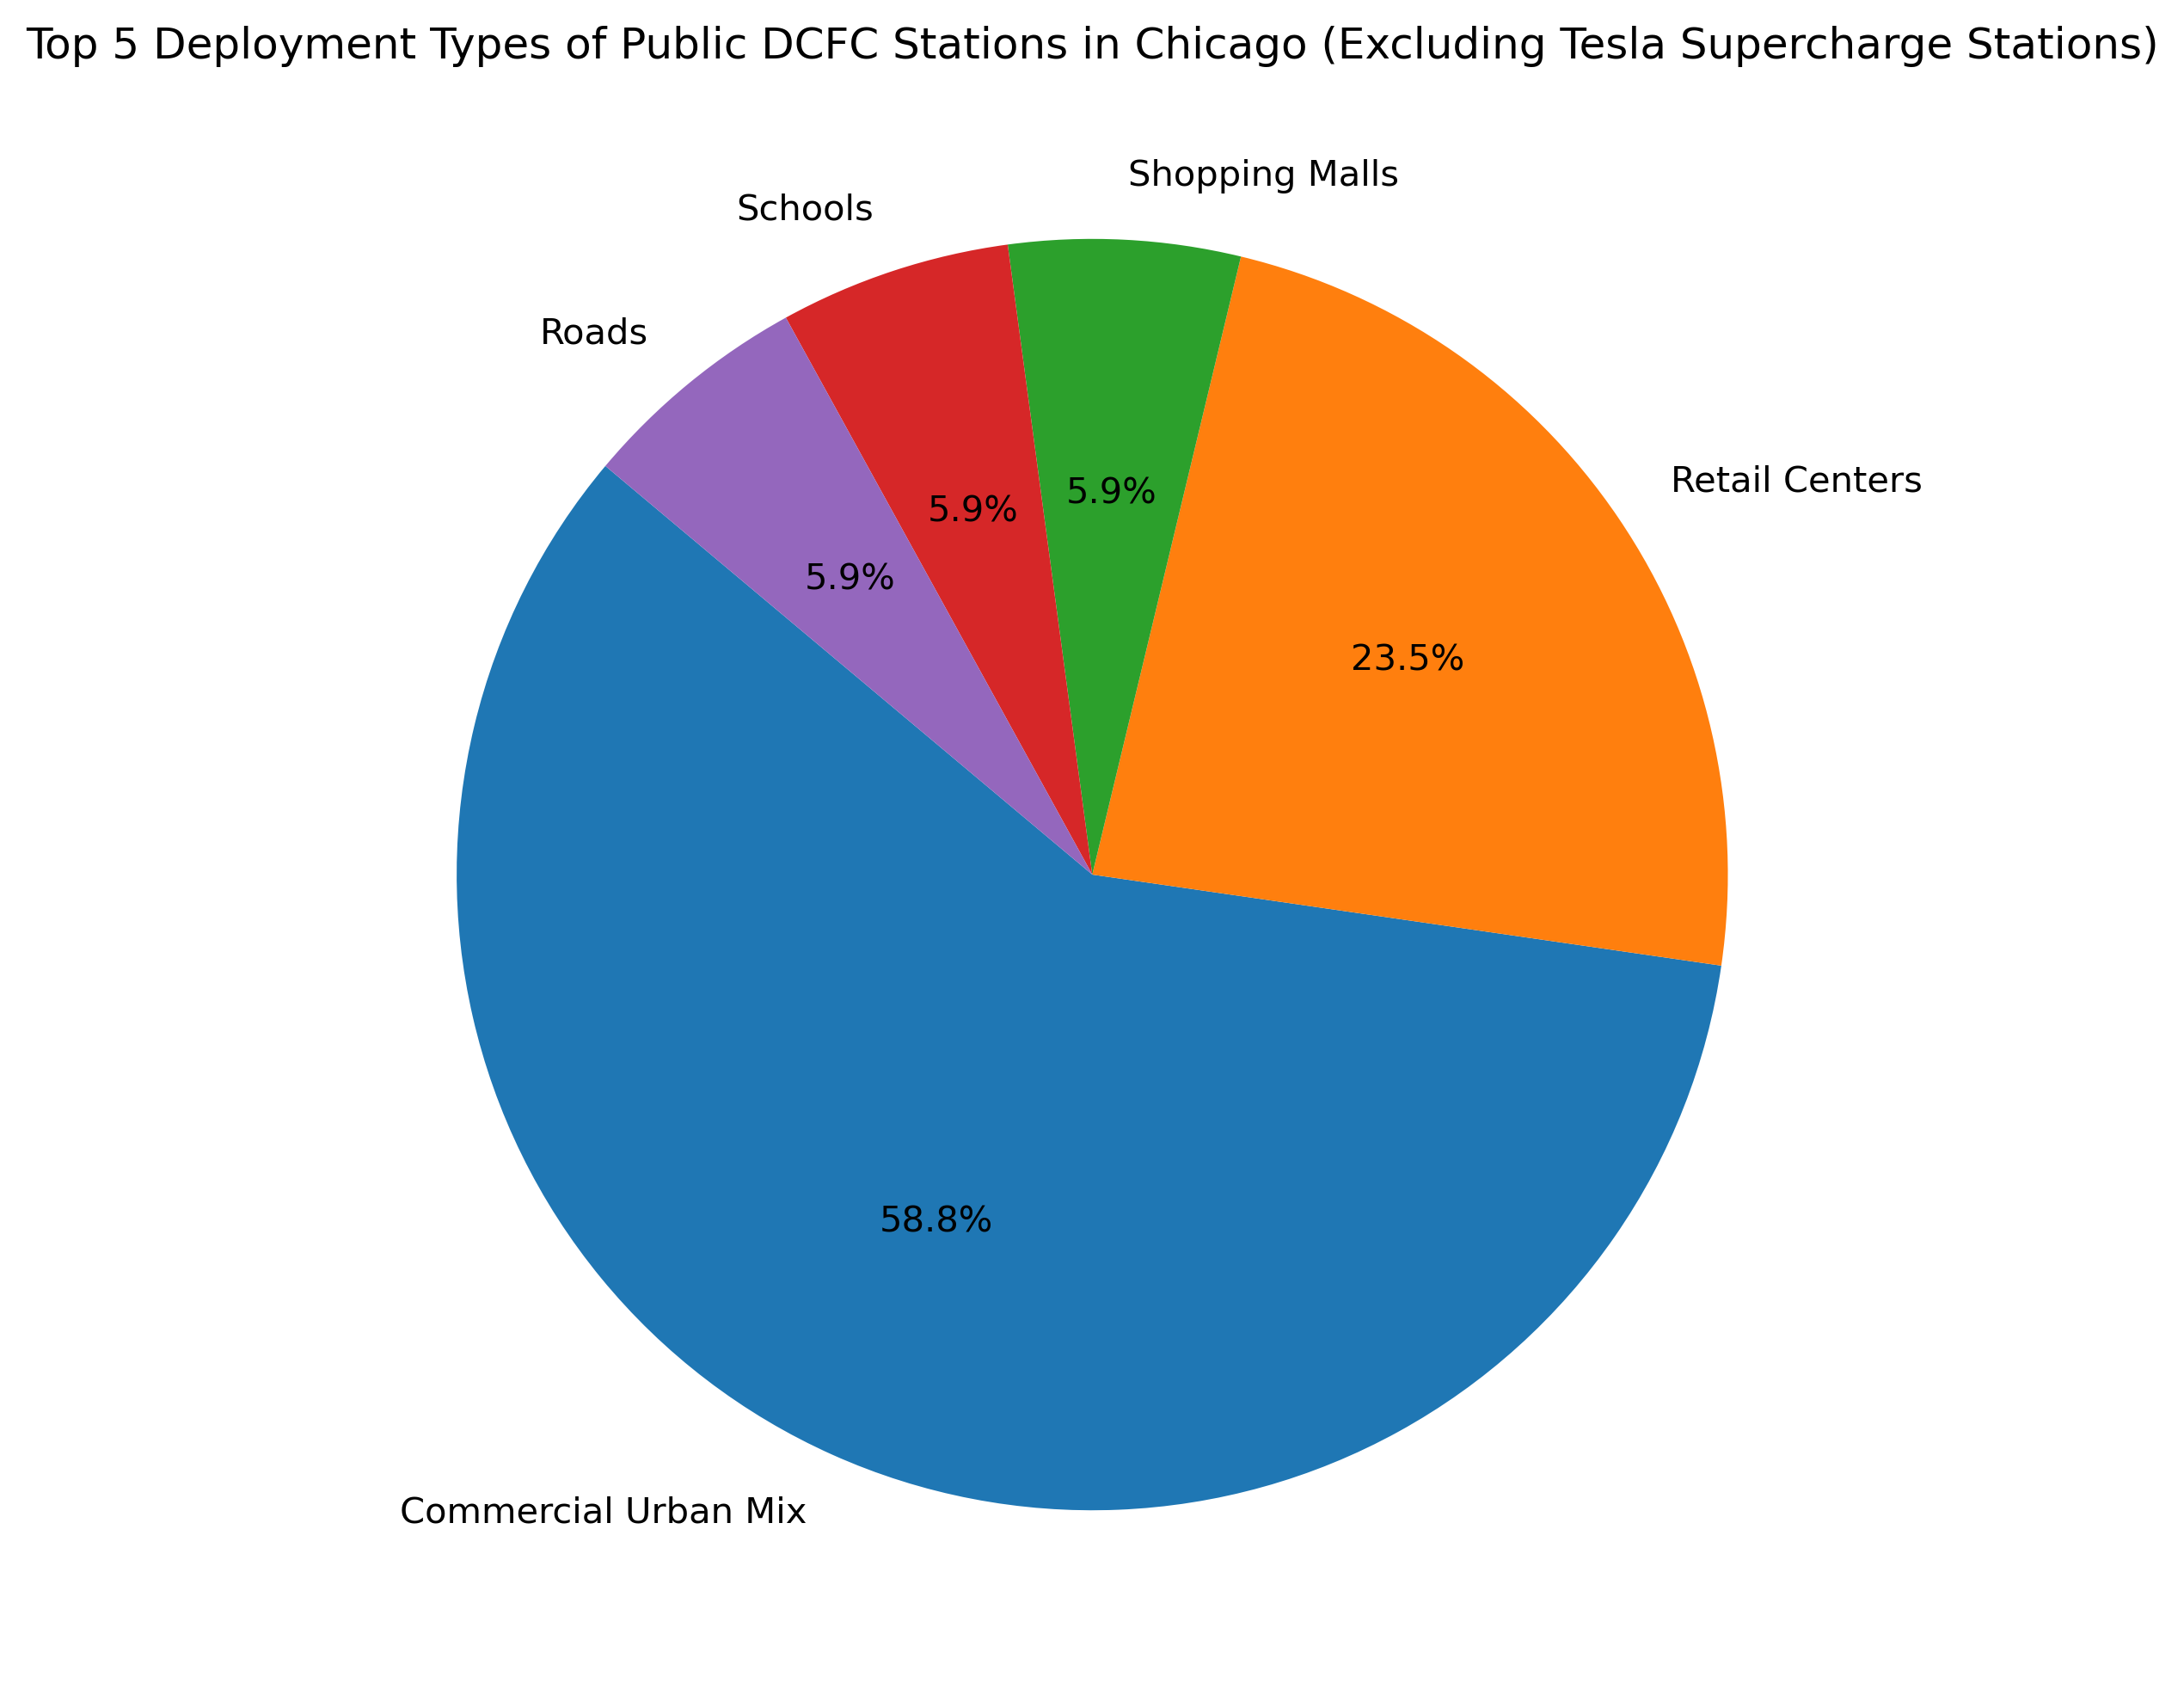

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 'updated_cstat' 是您的DataFrame，包含了相应的列
# 首先过滤出 DCFC_EVSE 大于0且 Stat_Network 不是 'Tesla' 的行
dcfc_stations = updated_cstat[(updated_cstat['DCFC_EVSE'] > 0) & (updated_cstat['Stat_Network'] != 'Tesla')]

# 计算每个类别的出现次数
deployment_counts = dcfc_stations['TYPE_USERDEF'].value_counts()

# 可选的步骤：选择出现次数最多的前5个类别
# top_deployment_counts = deployment_counts.nlargest(5)

# 绘制饼图显示不同部署类别的分布
plt.figure(figsize=(10, 8))
deployment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Deployment Types of Public DCFC Stations in Chicago (Excluding Tesla Supercharge Stations)')
plt.ylabel('')  # 这一行用来隐藏 y 轴的 'TYPE_USERDEF' 标签
plt.show()
